In [1]:
from torch import nn, optim
import SuperFirstMegaNetwork
from SuperFirstMegaNetwork import PrimeNet, train_model, SewnConvNet, make_connector_1conv, make_connector_2conv

Loaded 500 out of 144722 apples
Loaded 500 out of 209447 spiders
Loaded 500 out of 150152 octopuss
Loaded 500 out of 116685 snowflakes
X shape: (2000, 784), type:uint8


In [2]:
model1=PrimeNet(nn.ReLU, nn.MaxPool2d,2,0,0, k_size=5 )
criterion = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=1e-4)
epoch_num=20

output size conv_block: 16.0
output size conv_block: 32.0
output size beetween: 32.0
linear input size: 2048


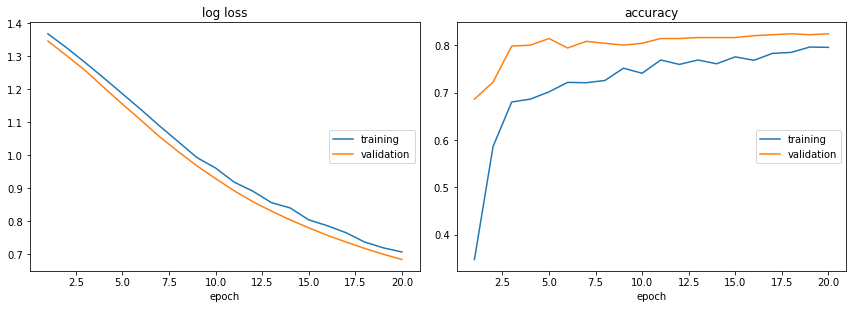

log loss:
training   (min:    0.706, max:    1.367, cur:    0.706)
validation (min:    0.683, max:    1.346, cur:    0.683)

accuracy:
training   (min:    0.347, max:    0.796, cur:    0.795)
validation (min:    0.686, max:    0.824, cur:    0.824)


In [3]:
model1_trained = train_model(model1, criterion, optimizer1, num_epochs=epoch_num)

In [4]:
#net_before = nn.Sequential(
#    model1.conv_block[0]
#)

#net_after=nn.Sequential(
#    model1.conv_block[1],
#    *model1.conv,
#    model1.linear_first,
#    *model1.linear,
#    model1.fc
#)

In [5]:
#layer_cut=1

In [6]:
#connector = make_connector_1conv(model1.give_num_of_ch_in_when_cut(layer_cut),model1.give_num_of_ch_out_when_cut(layer_cut))

In [7]:
#sewn_model2 = SewnConvNet(net_before, net_after, connector)
#optimizer = optim.Adam(sewn_model2.parameters(), lr=1e-4)

#sewn_model2_trained = train_model(sewn_model2, criterion, optimizer, num_epochs=epoch_num)

In [8]:
model2=PrimeNet(nn.ReLU, nn.MaxPool2d,1,2,1 )
criterion = nn.CrossEntropyLoss()
optimizer2= optim.Adam(model2.parameters(), lr=1e-4)

output size conv_block: 16.0
output size beetween: 16.0
output size conv: 16.0
output size conv: 16.0
linear input size: 4096
output size linear: 128


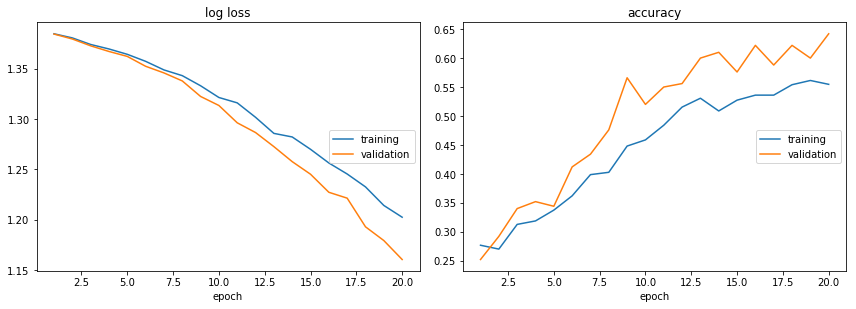

log loss:
training   (min:    1.202, max:    1.384, cur:    1.202)
validation (min:    1.160, max:    1.384, cur:    1.160)

accuracy:
training   (min:    0.270, max:    0.561, cur:    0.555)
validation (min:    0.252, max:    0.642, cur:    0.642)


In [9]:
model2_trained = train_model(model2, criterion, optimizer2, num_epochs=epoch_num)

In [10]:
net_before = nn.Sequential(
    model1.conv_block[0]
)

net_after=nn.Sequential(
    *model2.conv,
    model2.linear_first,
    *model2.linear,
    model2.fc
)

In [11]:
layer_cut_1=1
layer_cut_2=1
connector = make_connector_2conv(model1.give_num_of_ch_in_when_cut(layer_cut_1),model2.give_num_of_ch_out_when_cut(layer_cut_2))

In [12]:
print(model1.give_num_of_ch_in_when_cut(layer_cut_1))
print(model2.give_num_of_ch_out_when_cut(layer_cut_2))

16
16


In [ ]:
sewn_model3 = SewnConvNet(net_before, net_after, connector)
optimizer = optim.Adam(sewn_model3.parameters(), lr=1e-4)
sewn_model3_trained = train_model(sewn_model3, criterion, optimizer, num_epochs=epoch_num)

rozmiar przed x: {} torch.Size([64, 1, 32, 32])
rozmiar przed connector x: {} torch.Size([64, 16, 16, 16])
rozmiar po connector x: {} torch.Size([64, 16, 16, 16])
rozmiar powszystkim x: {} torch.Size([64, 4])
rozmiar przed x: {} torch.Size([64, 1, 32, 32])
rozmiar przed connector x: {} torch.Size([64, 16, 16, 16])
rozmiar po connector x: {} torch.Size([64, 16, 16, 16])
rozmiar powszystkim x: {} torch.Size([64, 4])
rozmiar przed x: {} torch.Size([64, 1, 32, 32])
rozmiar przed connector x: {} torch.Size([64, 16, 16, 16])
rozmiar po connector x: {} torch.Size([64, 16, 16, 16])
rozmiar powszystkim x: {} torch.Size([64, 4])
rozmiar przed x: {} torch.Size([64, 1, 32, 32])
rozmiar przed connector x: {} torch.Size([64, 16, 16, 16])
rozmiar po connector x: {} torch.Size([64, 16, 16, 16])